<a href="https://colab.research.google.com/github/jorgenriquez/Inteligencia_artificial/blob/main/01EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejemplo de Analisis Exploratorio de Datos

Usaremos el dataset de https://www.kaggle.com/datasets/ramjidoolla/ipl-data-set?select=matches.csv

# Parte 1

In [3]:
# Importamos las bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

In [4]:
# Leemos el dtaset
df=pd.read_csv('matches.csv')

In [5]:
# Despliege inicial
df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [6]:
# Obtenemos sus dimensiones
df.shape

(756, 18)

In [7]:
# obtenemos los tipos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [8]:
# Obtnemos los nombres de las columnas
df.columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [9]:
# Buscamos datos faltantes
df.isna().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

<Axes: >

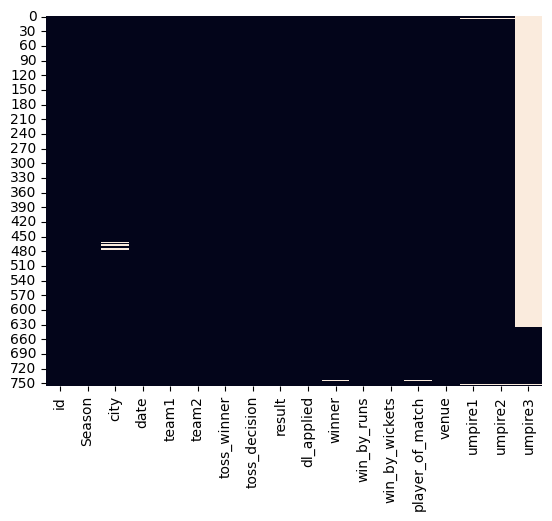

In [10]:
# Los visalizamos
sns.heatmap(df.isna(), cbar=False)

In [11]:
# Obtenemos la estadistica basica de las numericas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,756.0,1792.178571,3464.478148,1.0,189.75,378.5,567.25,11415.0
dl_applied,756.0,0.025132,0.156630,0.0,0.00,0.0,0.00,1.0
win_by_runs,756.0,13.283069,23.471144,0.0,0.00,0.0,19.00,146.0
win_by_wickets,756.0,3.350529,3.387963,0.0,0.00,4.0,6.00,10.0


In [12]:
# Ahora de las posibles categoricas
df.describe(include=['object']).T

,count,unique,top,freq
Season,756,12,IPL-2013,76
city,749,32,Mumbai,101
date,756,546,17-04-2011,2
team1,756,15,Mumbai Indians,101
team2,756,15,Royal Challengers Bangalore,95
toss_winner,756,15,Mumbai Indians,98
toss_decision,756,2,field,463
result,756,3,normal,743
winner,752,15,Mumbai Indians,109
player_of_match,752,226,CH Gayle,21


# Exploracion general de las variables
Exploramos la informacion que podemos obtener de cada variable

In [13]:
# Encontramos la cantidad de partidos
df['id'].count()

756

In [14]:
# Encontramos la cantidad de temporadas
temporadas=df['Season'].unique()
print(temporadas)
print(len(temporadas))

['IPL-2017' 'IPL-2008' 'IPL-2009' 'IPL-2010' 'IPL-2011' 'IPL-2012'
 'IPL-2013' 'IPL-2014' 'IPL-2015' 'IPL-2016' 'IPL-2018' 'IPL-2019']
12


In [15]:
# Encontramos el equipo que gano con el maximo de carreras
df.iloc[df['win_by_runs'].idxmax()]

id                               44
Season                     IPL-2017
city                          Delhi
date                     06-05-2017
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                         NaN
Name: 43, dtype: object

In [16]:
# Ahora el equipo que ha ganado teniendo mas wickets
df.iloc[df['win_by_wickets'].idxmax()]

id                                                      3
Season                                           IPL-2017
city                                               Rajkot
date                                           07-04-2017
team1                                       Gujarat Lions
team2                               Kolkata Knight Riders
toss_winner                         Kolkata Knight Riders
toss_decision                                       field
result                                             normal
dl_applied                                              0
winner                              Kolkata Knight Riders
win_by_runs                                             0
win_by_wickets                                         10
player_of_match                                   CA Lynn
venue              Saurashtra Cricket Association Stadium
umpire1                                       Nitin Menon
umpire2                                         CK Nandan
umpire3       

In [17]:
# El equipo que ha ganado teniendo menos wickets
df.iloc[df['win_by_wickets'].idxmin()]

id                                                         1
Season                                              IPL-2017
city                                               Hyderabad
date                                              05-04-2017
team1                                    Sunrisers Hyderabad
team2                            Royal Challengers Bangalore
toss_winner                      Royal Challengers Bangalore
toss_decision                                          field
result                                                normal
dl_applied                                                 0
winner                                   Sunrisers Hyderabad
win_by_runs                                               35
win_by_wickets                                             0
player_of_match                                 Yuvraj Singh
venue              Rajiv Gandhi International Stadium, Uppal
umpire1                                          AY Dandekar
umpire2                 

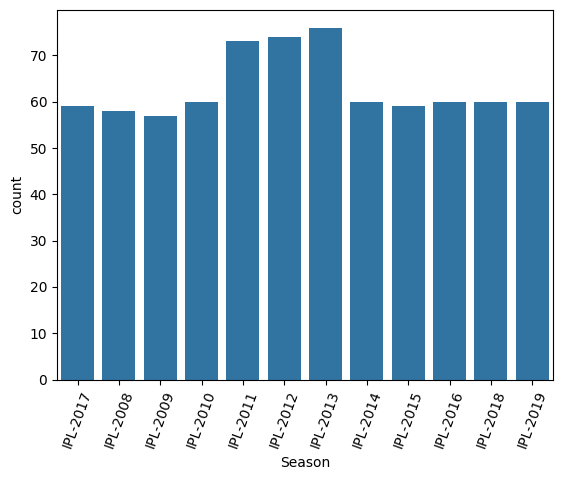

IPL-2013    76
IPL-2012    74
IPL-2011    73
IPL-2010    60
IPL-2014    60
IPL-2016    60
IPL-2018    60
IPL-2019    60
IPL-2017    59
IPL-2015    59
IPL-2008    58
IPL-2009    57
Name: Season, dtype: int64


In [18]:
# Encontramos la temporada con mayor cantidad de partidos
sns.countplot(data=df,x='Season')
plt.xticks(rotation=70)
plt.show()

# Vemos el numero de partidos por temporada
print(df['Season'].value_counts())

In [19]:
# Encontramos la mayor cantidad de victorias victorias por temporada
victoriasTemp=df.groupby('Season')['winner']
for n in victoriasTemp:
    print(n[0])
    print(n[1].value_counts())
    print('------')

IPL-2008
Rajasthan Royals               13
Kings XI Punjab                10
Chennai Super Kings             9
Delhi Daredevils                7
Mumbai Indians                  7
Kolkata Knight Riders           6
Royal Challengers Bangalore     4
Deccan Chargers                 2
Name: winner, dtype: int64
------
IPL-2009
Delhi Daredevils               10
Royal Challengers Bangalore     9
Deccan Chargers                 9
Chennai Super Kings             8
Kings XI Punjab                 7
Rajasthan Royals                6
Mumbai Indians                  5
Kolkata Knight Riders           3
Name: winner, dtype: int64
------
IPL-2010
Mumbai Indians                 11
Chennai Super Kings             9
Deccan Chargers                 8
Royal Challengers Bangalore     8
Kolkata Knight Riders           7
Delhi Daredevils                7
Rajasthan Royals                6
Kings XI Punjab                 4
Name: winner, dtype: int64
------
IPL-2011
Chennai Super Kings            11
Royal Challe

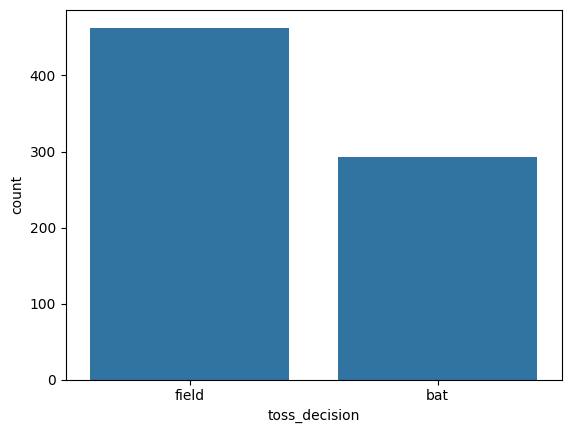

In [20]:
# Exploramos como se comporta el lanzamiento de la moneda
sns.countplot(data=df, x='toss_decision')
plt.show()

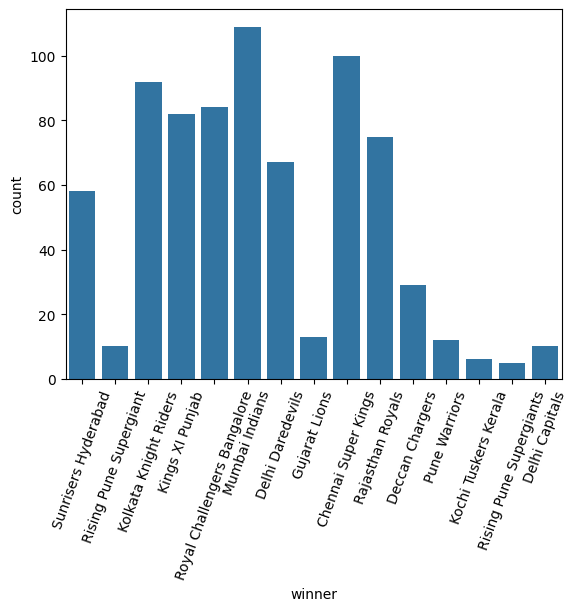

In [21]:
# Buscamos al equipo mas exitoso
sns.countplot(data=df,x='winner')
plt.xticks(rotation=70)
plt.show()


<Axes: xlabel='winner', ylabel='None'>

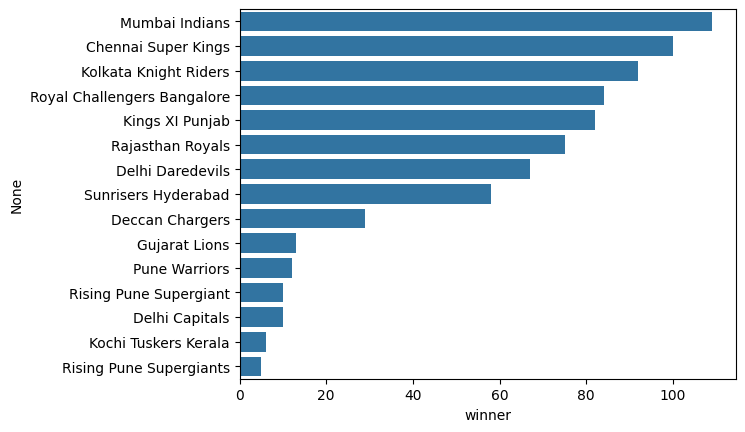

In [22]:
# mejoramos la presentacion para hacerlo mas facil de leer
ganadores=df['winner'].value_counts()
sns.barplot(y=ganadores.index, x=ganadores)

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Centurion          12
Ahmedabad          12
Rajkot             10
Mohali             10
Indore              9
Dharamsala          9
Johannesburg        8
Cuttack             7
Ranchi              7
Port Elizabeth      7
Cape Town           7
Abu Dhabi           7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
Nagpur              3
Kimberley           3
East London         3
Bloemfontein        2
Name: city, dtype: int64


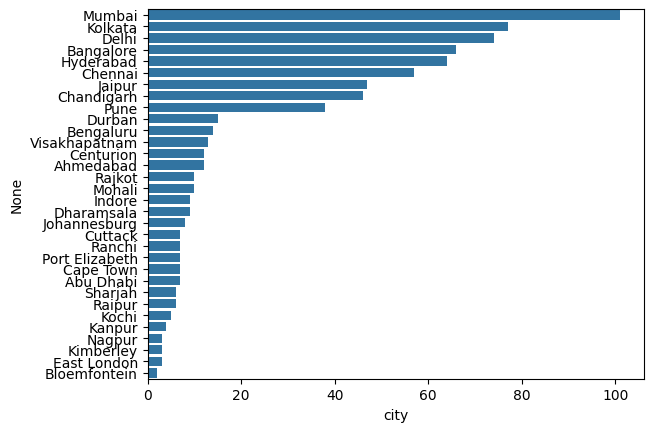

In [23]:
# Exploramos ahora por ciudad donde se juega
print(df['city'].value_counts())
ciudades=df['city'].value_counts()
sns.barplot(y=ciudades.index, x=ciudades)

plt.show()

# Parte 2

In [24]:
# Encontramos cuantas veces un equipo ha ganado cuando gana la tirada de la moneda inicial
print(np.sum(df['toss_winner']==df['winner']))
print('Porcentualmente',(np.sum(df['toss_winner']==df['winner']))/df.shape[0] )

393
Porcentualmente 0.5198412698412699


False    363
True     393
dtype: int64


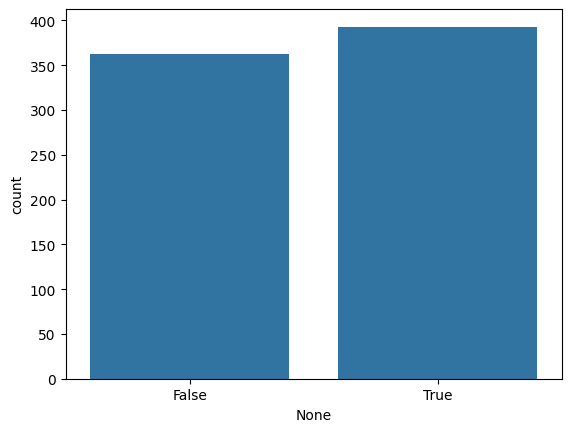

In [25]:
# Lo podemos presentar graficamente tambien
probabilidadGanar=df['toss_winner']==df['winner']

print(probabilidadGanar.groupby(probabilidadGanar).size())


sns.countplot(x=probabilidadGanar)
plt.show()

In [26]:
# Podemos explorar una variable y ver cuantas veces aparece cada valor
# Player of the match es el jugador mas valioso de ese partido
df['player_of_match'].value_counts()

CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
                  ..
PD Collingwood     1
NV Ojha            1
AC Voges           1
J Theron           1
S Hetmyer          1
Name: player_of_match, Length: 226, dtype: int64

In [ ]:
# Obtenemos los cinco mas importantes
df['player_of_match'].value_counts()[:5]

CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
Name: player_of_match, dtype: int64

In [27]:
# Si lo deseamos los podemos extraer como una lista
importantes=list(df['player_of_match'].value_counts()[:5].keys())
puntajes=list(df['player_of_match'].value_counts()[:5])
print(importantes)
print(puntajes)

['CH Gayle', 'AB de Villiers', 'RG Sharma', 'MS Dhoni', 'DA Warner']
[21, 20, 17, 17, 17]


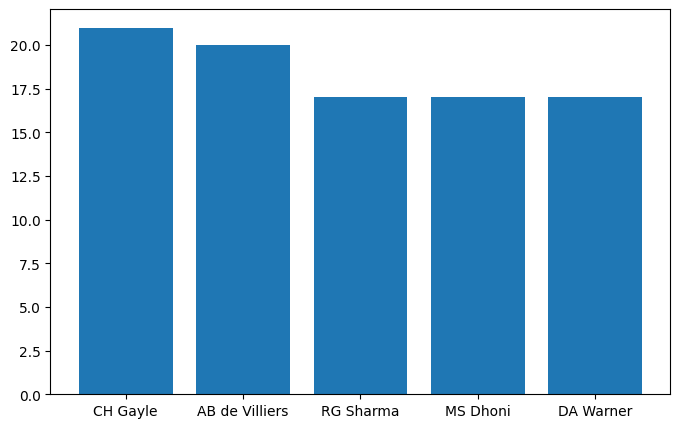

In [28]:
# Hacemos un boxplot para ver sus puntajes
plt.figure(figsize=(8,5))
plt.bar(x=importantes,height=puntajes)
plt.show()

In [29]:
# Investigamos ahora la variable result y sus valores
df['result'].value_counts()

normal       743
tie            9
no result      4
Name: result, dtype: int64

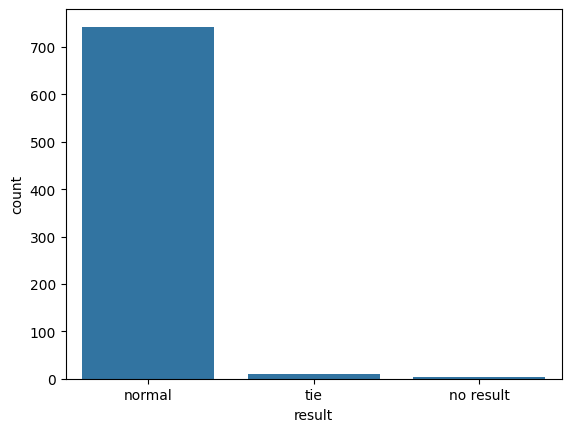

In [30]:
# otra opcion para la grafica de barras es usar el countplot de seaborn
sns.countplot(data=df, x='result')
plt.show()

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Royal Challengers Bangalore    81
Kings XI Punjab                81
Delhi Daredevils               80
Rajasthan Royals               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64


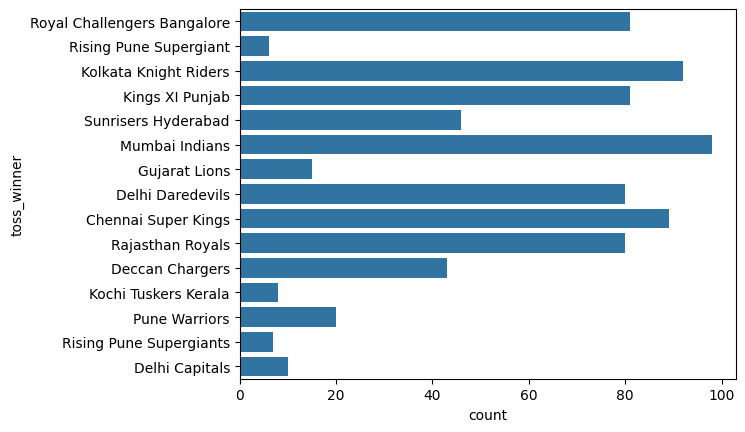

In [31]:
# investigamos toss_winner
print(df['toss_winner'].value_counts())

# En esta ocasion cambiamos la orientacion de la grafica
sns.countplot(data=df, y='toss_winner')
plt.show()

In [ ]:
# Hacemos una seleccion condicional para obtener los que ganaron el primer bateo
# Nos da como resultado un dataframe con solo aquellos que cumplen con la condicion
primerBateo=df[df['win_by_runs']!=0]
primerBateo.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
8,9,IPL-2017,Pune,11-04-2017,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
13,14,IPL-2017,Kolkata,15-04-2017,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kolkata Knight Riders,17,0,RV Uthappa,Eden Gardens,AY Dandekar,NJ Llong,NaN
14,15,IPL-2017,Delhi,15-04-2017,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,normal,0,Delhi Daredevils,51,0,CJ Anderson,Feroz Shah Kotla,YC Barde,Nitin Menon,NaN


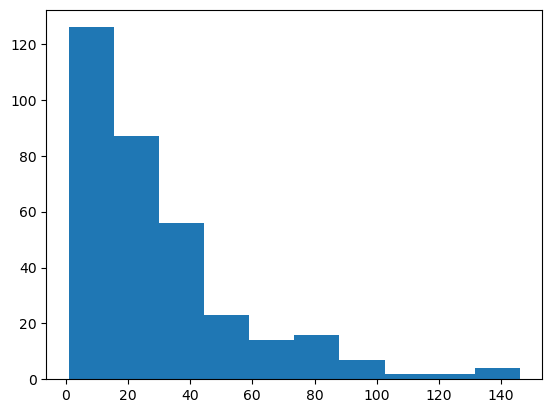

In [ ]:
# hacemos un histograma de win_by_runs
plt.hist(primerBateo['win_by_runs'])
plt.show()

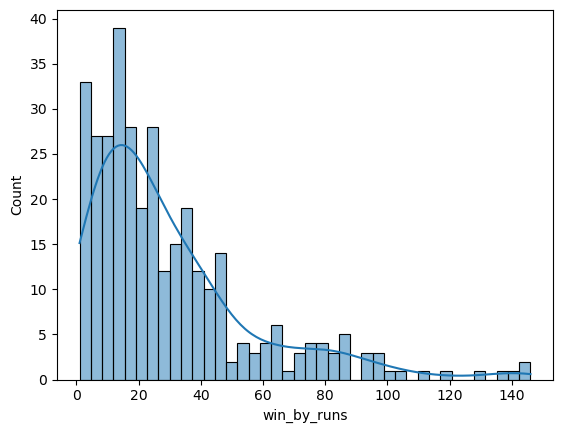

In [ ]:
# Podemos usar seaborn tambien y ver la distribucion
sns.histplot(data=primerBateo, x='win_by_runs', kde=True, bins=40)
plt.show()

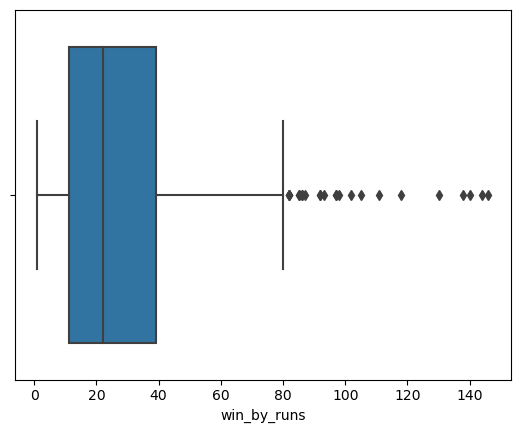

In [ ]:
# Podemos explorar su boxplot
sns.boxplot(data=primerBateo, x='win_by_runs')
plt.show()

Mumbai Indians                 57
Chennai Super Kings            52
Kings XI Punjab                38
Kolkata Knight Riders          36
Royal Challengers Bangalore    35
Sunrisers Hyderabad            30
Rajasthan Royals               27
Delhi Daredevils               25
Deccan Chargers                18
Pune Warriors                   6
Rising Pune Supergiant          5
Delhi Capitals                  3
Kochi Tuskers Kerala            2
Rising Pune Supergiants         2
Gujarat Lions                   1
Name: winner, dtype: int64


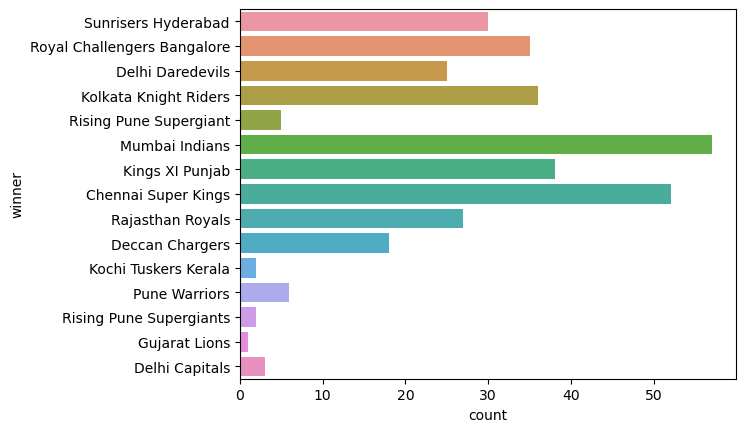

In [ ]:
# vemos la cantidad de veces que han ganado los equipos despues de batear primero
print(primerBateo['winner'].value_counts())
sns.countplot(data=primerBateo, y='winner')
plt.show()

In [ ]:
# Extraemos solo los cinco mejores
mejores=list(primerBateo['winner'].value_counts()[:5].keys())
puntajesE=list(primerBateo['winner'].value_counts()[:5])
print(mejores)
print(puntajesE)

['Mumbai Indians', 'Chennai Super Kings', 'Kings XI Punjab', 'Kolkata Knight Riders', 'Royal Challengers Bangalore']
[57, 52, 38, 36, 35]


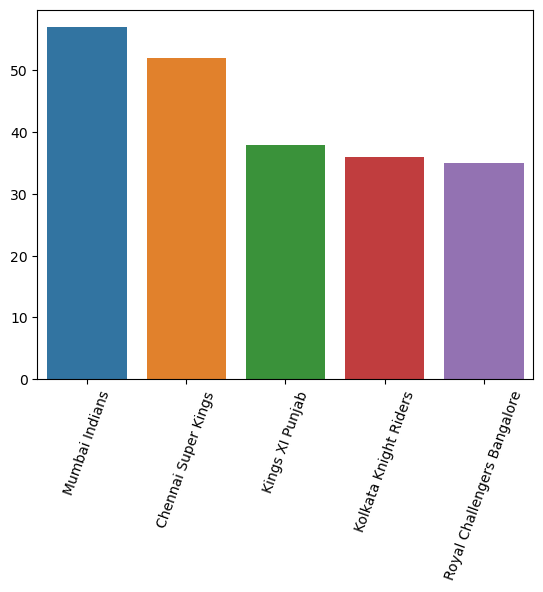

In [ ]:
sns.barplot(x=mejores, y=puntajesE)
plt.xticks(rotation=70)
plt.show()

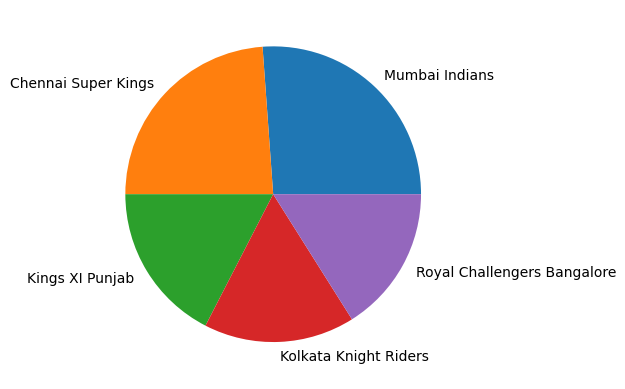

In [ ]:
# Tambien lo podemos desplegar como grafica de pie
plt.pie(puntajesE,labels=mejores)
plt.show()

In [ ]:
# Extraemos la informacion de los que ganan siendo los segundos al bat
segundoBateo=df[df['win_by_wickets']!=0]
segundoBateo.head()


,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
5,6,IPL-2017,Hyderabad,09-04-2017,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,7,IPL-2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN


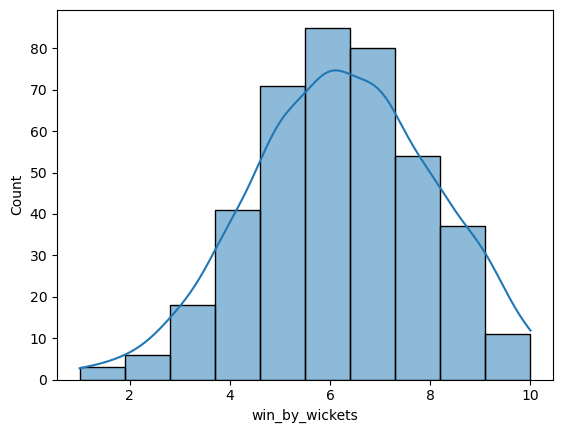

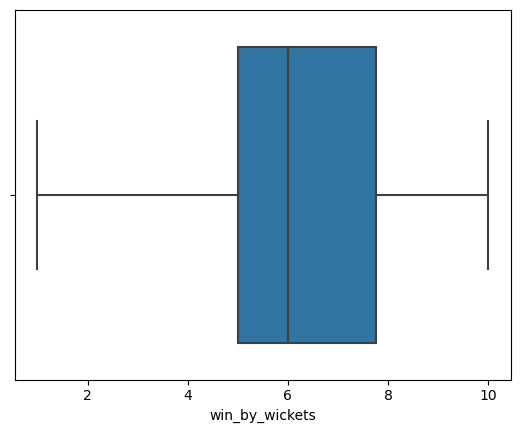

Kolkata Knight Riders          56
Mumbai Indians                 50
Royal Challengers Bangalore    48
Chennai Super Kings            48
Rajasthan Royals               46
Kings XI Punjab                42
Delhi Daredevils               42
Sunrisers Hyderabad            27
Gujarat Lions                  12
Deccan Chargers                11
Pune Warriors                   6
Delhi Capitals                  6
Rising Pune Supergiant          5
Kochi Tuskers Kerala            4
Rising Pune Supergiants         3
Name: winner, dtype: int64


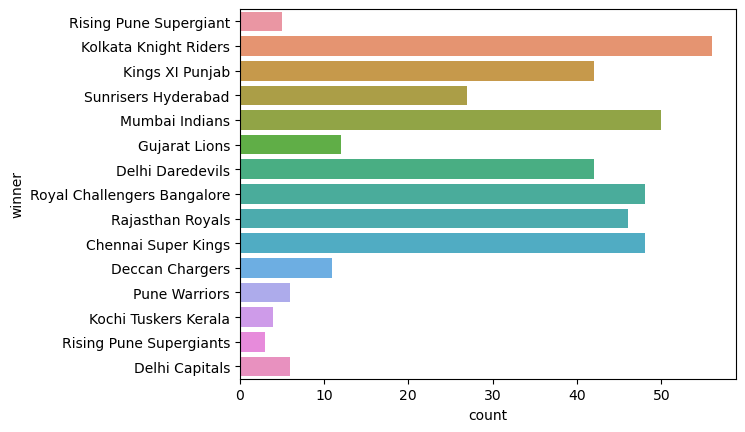

In [ ]:
# Podemos usar seaborn tambien y ver la distribucion
sns.histplot(data=segundoBateo, x='win_by_wickets', kde=True, bins=10)
plt.show()

# Podemos explorar su boxplot
sns.boxplot(data=segundoBateo, x='win_by_wickets')
plt.show()

# vemos la cantidad de veces que han ganado los equipos despues de batear primero
print(segundoBateo['winner'].value_counts())
sns.countplot(data=segundoBateo, y='winner')
plt.show()

['Kolkata Knight Riders', 'Mumbai Indians', 'Royal Challengers Bangalore', 'Chennai Super Kings', 'Rajasthan Royals']
[56, 50, 48, 48, 46]


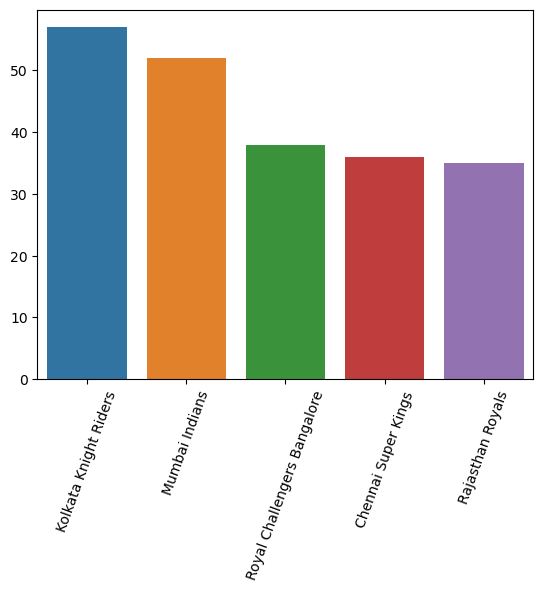

In [ ]:
# Extraemos solo los cinco mejores
mejoresS=list(segundoBateo['winner'].value_counts()[:5].keys())
puntajesES=list(segundoBateo['winner'].value_counts()[:5])
print(mejoresS)
print(puntajesES)

sns.barplot(x=mejoresS, y=puntajesE)
plt.xticks(rotation=70)
plt.show()
